In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from decimal import Decimal

# Reading the CSV files
The training and testing data sets are saved into their respective DataFrames

In [2]:
# Replace these with your own file locations
esrb_train = pd.read_csv(r"C:\Users\mckee\Downloads\Video_games_esrb_rating_no_duplicates.csv")
esrb_test = pd.read_csv(r"C:\Users\mckee\Downloads\test_esrb_no_duplicates.csv")

In [3]:
esrb_train.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
esrb_test.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET


# Information about datasets

In [5]:
print("Training dataset shape:",esrb_train.shape)
print("Testing dataset shape:",esrb_test.shape)

Training dataset shape: (1883, 34)
Testing dataset shape: (493, 34)


In [6]:
esrb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1883 non-null   object
 1   console                   1883 non-null   int64 
 2   alcohol_reference         1883 non-null   int64 
 3   animated_blood            1883 non-null   int64 
 4   blood                     1883 non-null   int64 
 5   blood_and_gore            1883 non-null   int64 
 6   cartoon_violence          1883 non-null   int64 
 7   crude_humor               1883 non-null   int64 
 8   drug_reference            1883 non-null   int64 
 9   fantasy_violence          1883 non-null   int64 
 10  intense_violence          1883 non-null   int64 
 11  language                  1883 non-null   int64 
 12  lyrics                    1883 non-null   int64 
 13  mature_humor              1883 non-null   int64 
 14  mild_blood              

In [7]:
esrb_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     493 non-null    object
 1   console                   493 non-null    int64 
 2   alcohol_reference         493 non-null    int64 
 3   animated_blood            493 non-null    int64 
 4   blood                     493 non-null    int64 
 5   blood_and_gore            493 non-null    int64 
 6   cartoon_violence          493 non-null    int64 
 7   crude_humor               493 non-null    int64 
 8   drug_reference            493 non-null    int64 
 9   fantasy_violence          493 non-null    int64 
 10  intense_violence          493 non-null    int64 
 11  language                  493 non-null    int64 
 12  lyrics                    493 non-null    int64 
 13  mature_humor              493 non-null    int64 
 14  mild_blood                

All but two of the columns are integers, and there are no missing values.

In [8]:
esrb_train.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.475836,0.050451,0.010090,0.228359,0.126394,0.019649,0.054700,0.033988,0.220393,0.118428,...,0.013277,0.034519,0.056824,0.067446,0.118959,0.035582,0.117897,0.015932,0.015932,0.063728
std,0.499548,0.218933,0.099969,0.419887,0.332381,0.138829,0.227454,0.181247,0.414622,0.323200,...,0.114487,0.182608,0.231568,0.250859,0.323826,0.185294,0.322572,0.125246,0.125246,0.244333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
esrb_test.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,...,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,0.494929,0.052738,0.002028,0.247465,0.133874,0.022312,0.040568,0.030426,0.263692,0.075051,...,0.058824,0.020284,0.010142,0.022312,0.052738,0.050710,0.077079,0.087221,0.050710,0.312373
std,0.500482,0.223738,0.045038,0.431977,0.340863,0.147847,0.197487,0.171931,0.441082,0.263741,...,0.235533,0.141113,0.100297,0.147847,0.223738,0.219628,0.266988,0.282445,0.219628,0.463932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As expected, each of the columns that contain binary data have a minimum of 0 and a maximum of 1 with no inbetween values, as they should. Humorously, the only error seems to be that the "strong_language" attribute is mislabeled as "strong_janguage".

In [10]:
# Fixing the mislabeled column...
esrb_train.rename(columns={"strong_janguage": "strong_language"})
esrb_test.rename(columns={"strong_janguage": "strong_language"})

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
489,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
490,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
491,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


# Dealing with Duplicates

In [11]:
print(esrb_train.duplicated().sum())
print(esrb_test.duplicated().sum())
esrb_test[esrb_test.duplicated(keep=False)]

0
0


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating


Any existing duplicates were removed from the CSVs directly (hence the file names) before the files were imported since there were very few duplicates. Specifically, there were 12 records removed from the training database and 7 removed from the testing database.

# Datasets Details

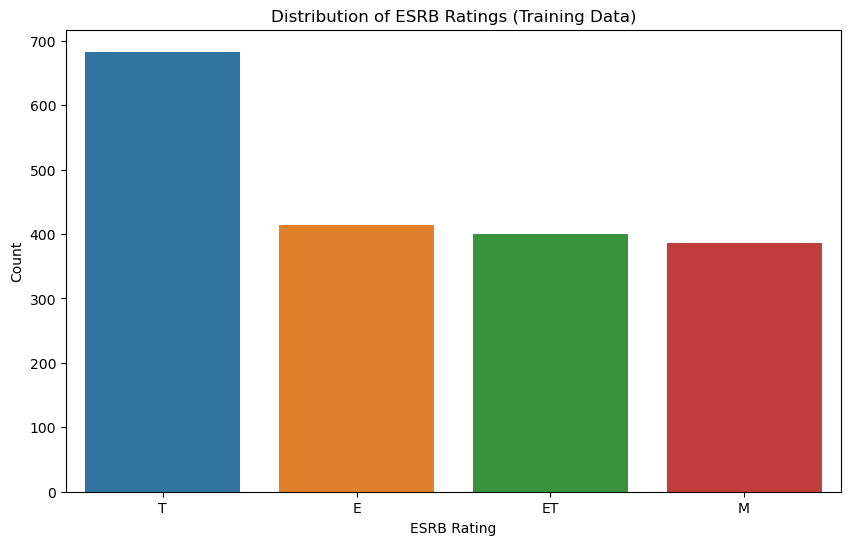

Exact counts:


T     683
E     414
ET    400
M     386
Name: esrb_rating, dtype: int64

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=esrb_train, x='esrb_rating', order=esrb_train['esrb_rating'].value_counts().index)
plt.title("Distribution of ESRB Ratings (Training Data)")
plt.xlabel("ESRB Rating")
plt.ylabel("Count")
plt.show()

print("Exact counts:")
esrb_train.esrb_rating.value_counts()

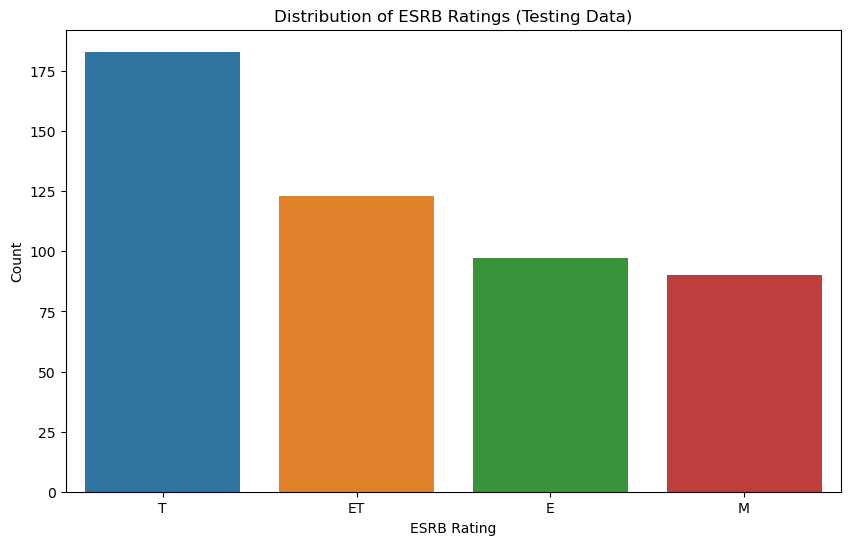

Exact counts:


T     183
ET    123
E      97
M      90
Name: esrb_rating, dtype: int64

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=esrb_test, x='esrb_rating', order=esrb_test['esrb_rating'].value_counts().index)
plt.title("Distribution of ESRB Ratings (Testing Data)")
plt.xlabel("ESRB Rating")
plt.ylabel("Count")
plt.show()

print("Exact counts:")
esrb_test.esrb_rating.value_counts()

Percentage wise, the distribution of the four ESRB ratings included in the datasets is about even between the training and testing data. "T" makes up slightly over a third of each set (36.3% in training, 37.1% in testing), "M" is roughly a fifth of each set (20.5% in training, 18.3% in testing), and "E" and "ET" are both slightly higher than "M" ("E": 22.0% in training, 19.7% in testing; "ET": 21.2% in training, 24.9% in testing).

The differences in distribution are small, so they should not affect the performance of any predictive models significantly.

In [14]:
# Finding what percentage of the data is testing data...
esrb_test.shape[0]/(esrb_train.shape[0] + esrb_test.shape[0])

0.2074915824915825

Roughly 20% of the data between the training and testing files is reserved for testing the model, which is acceptable.

# Splitting the data

In [15]:
# Due to how the data set is formatted (two files: one for training, one for testing), there is no real need 
# to use test_train_split. Instead, the data can be manually put into the corresponding train and test groups.

# The "title" and "console" "esrb_rating" columns are dropped from the DataFrames because they should have no
# influence on the ESRB rating of the game. Games are given ESRB ratings based on their content, and the console
# a game can be played on has no influence on this. Furthermore, the title of a game is designed to be marketable,
# so it should never be a reason to raise a game's ESRB rating.

# Splitting the training data
X_train = esrb_train.drop(["title", "console", "esrb_rating"], axis=1)
y_train = esrb_train['esrb_rating']

# Splitting the testing data
X_test = esrb_test.drop(['title', 'console', 'esrb_rating'], axis=1)
y_test = esrb_test['esrb_rating']

Since all of the attributes/variables are binary in nature, there is no need to scale/transform the data.

# Data Model #1: Bernoulli Naive Bayes
Since all of the attributes/features in X are binomial in nature, Bernoulli Naive Bayes seemed like a good model to start with.

In [16]:
# A logarithmic sweep of alpha values is created to see which is best for the model.
alpha_values = np.logspace(-10,10,num=21)
cv_scores_bernoulli = []

for i in alpha_values:
    nb = BernoulliNB(alpha=i)
    nb.fit(X_train,y_train)
    
    # 5 folds were chosen for the cross validation process.
    score = cross_val_score(nb,X_train,y_train,cv=5,scoring='accuracy')
    cv_scores_bernoulli.append(np.mean(score))

# Store the alpha value that gave the highest accuracy
highest_alpha = np.argmax(cv_scores_bernoulli)
print("Alpha value with highest accuracy:",highest_alpha)
print("Accuracy scores per alpha value:")
for idx,val in enumerate(alpha_values):
    print('{:.2e}'.format(Decimal(val)),": ",cv_scores_bernoulli[idx])

Alpha value with highest accuracy: 9
Accuracy scores per alpha value:
1.00e-10 :  0.8343402562221345
1.00e-9 :  0.8343402562221345
1.00e-8 :  0.8343402562221345
1.00e-7 :  0.8343402562221345
1.00e-6 :  0.8343402562221345
1.00e-5 :  0.8343402562221345
1.00e-4 :  0.8343402562221345
1.00e-3 :  0.8343402562221345
1.00e-2 :  0.8343402562221345
1.00e-1 :  0.8354026750945314
1.00e+0 :  0.8322168293921779
1.00e+1 :  0.8051258536034765
1.00e+2 :  0.5316073141825159
1.00e+3 :  0.36271798634234437
1.00e+4 :  0.36271798634234437
1.00e+5 :  0.36271798634234437
1.00e+6 :  0.36271798634234437
1.00e+7 :  0.36271798634234437
1.00e+8 :  0.36271798634234437
1.00e+9 :  0.36271798634234437
1.00e+10 :  0.36271798634234437


Interestingly, 1.00e-10 to 1.00e-2 all appear to have the exact same accuracy as each other, but 1.00e-1 was the highest alpha value in terms of score. A graph of the accuracies was made to confirm this.

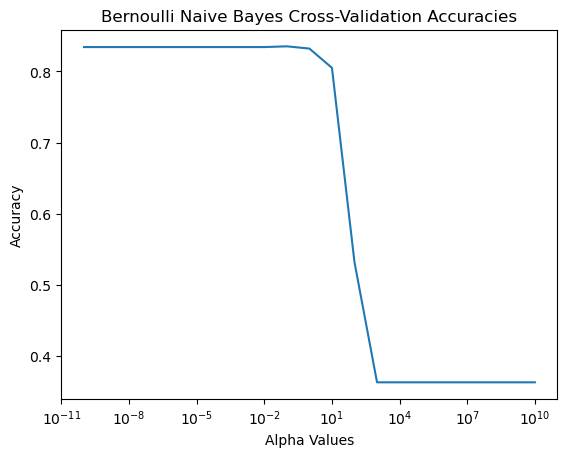

In [17]:
plt.semilogx(alpha_values,cv_scores_bernoulli)
plt.title("Bernoulli Naive Bayes Cross-Validation Accuracies")
plt.xlabel("Alpha Values")
plt.ylabel("Accuracy")
plt.show()

Accuracy: 0.8154158215010142


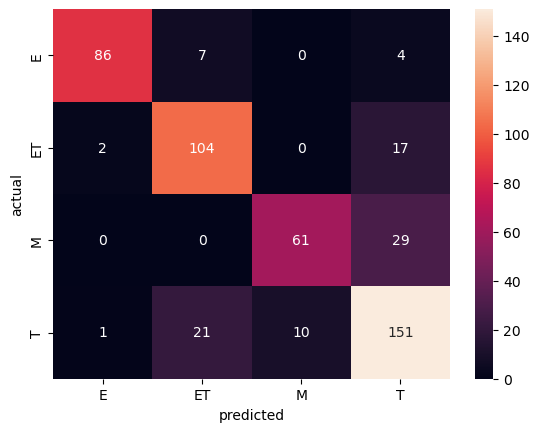

In [18]:
# With the highest accuracy alpha value known, the model is trained and tested.
bernoulli_nb = BernoulliNB(alpha=alpha_values[highest_alpha])
bernoulli_nb.fit(X_train,y_train)

predictions = bernoulli_nb.predict(X_test)

# A confusion matrix is made to show how the model fared at predicting new data.
data = {"y_predicted":predictions,"y_actual":y_test}
df_conf = pd.DataFrame(data,columns = ['y_actual','y_predicted'])
confusion_matrix = pd.crosstab(df_conf['y_actual'],df_conf['y_predicted'],
                              rownames=['actual'],colnames=['predicted'])

sns.heatmap(confusion_matrix,annot=True,fmt='d')

print('Accuracy:',bernoulli_nb.score(X_test,y_test))

Out of 493 predictions, 402 of them were correct and 91 of them were incorrect. As shown above, this results in an overall accuracy of ~81.5%. Further analysis is done to find the precision and recall of each category.

In [19]:
# Calculating the precision of each category...

# precision_totals is found by summing the values in each column (i.e., the total number of predictions for each rating)
# precision_TPs is found by storing the values where each rating intersects with itself (e.g., the value of [E,E] = 88)
# TP stands for True Positive, which refers to predictions that were correct.
precision_totals = [i for i in confusion_matrix.sum(axis=0)]
precision_TPs = [confusion_matrix.values[i,i] for i in range(0,4)]

# For each rating, calculate and print the precision.
for idx,val in enumerate(confusion_matrix):
    print(val,"precision:",(precision_TPs[idx]/precision_totals[idx]))

E precision: 0.9662921348314607
ET precision: 0.7878787878787878
M precision: 0.8591549295774648
T precision: 0.7512437810945274


The "T" category has the lowest precision, meaning that if the model predicted that a game was rated "T", it was more likely to be wrong. Conversely, the precision of the "E" category was the highest at 96.6%, meaning that if the model predicted that a game was rated "E", it was almost certainly correct. 
The overall order, in terms of greatest to least precision, is: E, M, ET, T.

In [20]:
# Calculating the recall of each category...

# recall_totals is found by summing the values in each row (i.e., the total number of actual games/records for each rating)
# recall_TPs is found by storing the values where each rating intersects with itself (e.g., the value of [E,E] = 88)
# TP stands for True Positive, which refers to predictions that were correct.
recall_totals = [i for i in confusion_matrix.sum(axis=1)]
recall_TPs = [confusion_matrix.values[i,i] for i in range(0,4)]

# For each rating, calculate and print the recall.
for idx,val in enumerate(confusion_matrix):
    print(val,"recall:",(recall_TPs[idx]/recall_totals[idx]))

E recall: 0.8865979381443299
ET recall: 0.8455284552845529
M recall: 0.6777777777777778
T recall: 0.825136612021858


The "M" category has the lowest recall, meaning that the model struggled with classifying games that were rated "M" the most. Out of the 90 games that were actually rated "M", the model predicted 29 of them were rated "T", thus resulting in a recall of ~67.8%. The "E" category has the highest recall at ~88.7%, meaning that out of the 97 games that were actually rated "E", the model successfully classified 86 of them. This means that the model is rather good at classifying games that are rated "E".
The overall order, in terms of greatest to least recall, is: E, ET, T, M

# Other Notes about Model #1: Bernoulli Naive Bayes

Interestingly, whenever the "M" rating was involved with a prediction (i.e., the game either is actually rated "M" or the model predicts that it is rated "M"), mistakes in the predictions only ever occurred with the "T" category. In other words, if a game was predicted as being rated "M", the game was either actually rated "M" or it was rated "T". Similarly, if a game was actually rated "M", it was either predicted as being rated "M" or predicted as being rated "T". This shows that the model can successfully determine which descriptors for a video game are not suitable for children, even if it cannot fully differentiate between themes that are more suitable for Teens and Mature audiences as well. For a rating system, this would be a desirable outcome, since you would not be wrongly classifying mature content well below its recommended/target audience.

In general, most mistakes with the model involve the "T" rating. Out of the 91 incorrect predictions that the model made, 82 of them were related to the "T" rating in some way. 32 of these incorrect predictions were "T" rated games being rated as something else, and the remaining 50 were "E", "ET", and "M" rated games incorrectly being classified as being rated "T".

# Model #2: Multinomial Naive Bayes
Another version of Naive Bayes is used to compare the performance between two versions of the same algorithm.

In [21]:
# The data is split from the original DataFrames again to ensure that the algorithm starts with a fresh version of the data.
# Splitting the training data
X_train = esrb_train.drop(["title", "console", "esrb_rating"], axis=1)
y_train = esrb_train['esrb_rating']

# Splitting the testing data
X_test = esrb_test.drop(['title', 'console', 'esrb_rating'], axis=1)
y_test = esrb_test['esrb_rating']

In [22]:
# A logarithmic sweep of alpha values is created to see which is best for the model.
alpha_values = np.logspace(-10,10,num=21)
cv_scores_multinomial = []

for i in alpha_values:
    m_nb = MultinomialNB(alpha=i)
    m_nb.fit(X_train,y_train)
    
    # 5 folds were chosen for the cross validation process.
    score = cross_val_score(m_nb,X_train,y_train,cv=5,scoring='accuracy')
    cv_scores_multinomial.append(np.mean(score))

# Store the alpha value that gave the highest accuracy
highest_alpha = np.argmax(cv_scores_multinomial)
print("Alpha value with highest accuracy:",highest_alpha)
print("Accuracy scores per alpha value:")
for idx,val in enumerate(alpha_values):
    print('{:.2e}'.format(Decimal(val)),": ",cv_scores_multinomial[idx])

Alpha value with highest accuracy: 9
Accuracy scores per alpha value:
1.00e-10 :  0.8263784637959253
1.00e-9 :  0.8263784637959253
1.00e-8 :  0.8263784637959253
1.00e-7 :  0.8263784637959253
1.00e-6 :  0.8263784637959253
1.00e-5 :  0.8263784637959253
1.00e-4 :  0.8263784637959253
1.00e-3 :  0.8263784637959253
1.00e-2 :  0.8263784637959253
1.00e-1 :  0.827439471753485
1.00e+0 :  0.8274366499238106
1.00e+1 :  0.8125726621141147
1.00e+2 :  0.7557381906428129
1.00e+3 :  0.36271798634234437
1.00e+4 :  0.36271798634234437
1.00e+5 :  0.36271798634234437
1.00e+6 :  0.36271798634234437
1.00e+7 :  0.36271798634234437
1.00e+8 :  0.36271798634234437
1.00e+9 :  0.36271798634234437
1.00e+10 :  0.36271798634234437


This time the highest alpha value was also 1.00e-1 (which is at index 9 in the list of alpha values). The alpha values are also graphed below.

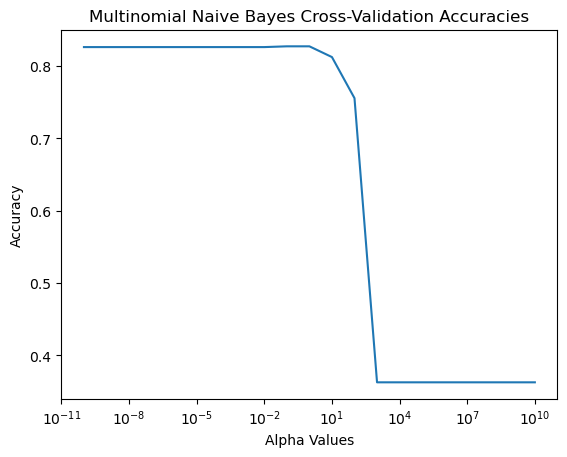

In [23]:
plt.semilogx(alpha_values,cv_scores_multinomial)
plt.title("Multinomial Naive Bayes Cross-Validation Accuracies")
plt.xlabel("Alpha Values")
plt.ylabel("Accuracy")
plt.show()

Accuracy: 0.7931034482758621


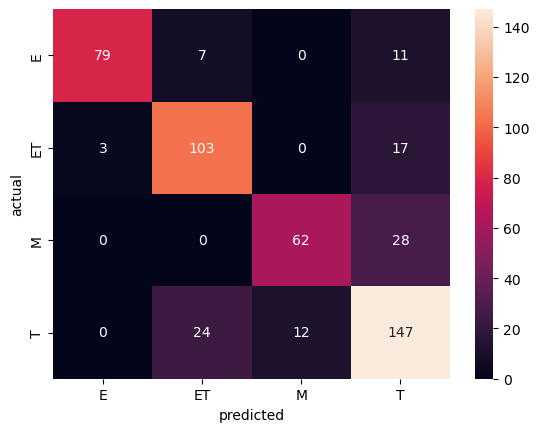

In [24]:
# With the highest accuracy alpha value known, the model is trained and tested.
multinomial_nb = MultinomialNB(alpha=alpha_values[highest_alpha])
multinomial_nb.fit(X_train,y_train)

predictions = multinomial_nb.predict(X_test)

# A confusion matrix is made to show how the model fared at predicting new data.
data = {"y_predicted":predictions,"y_actual":y_test}
df_conf = pd.DataFrame(data,columns = ['y_actual','y_predicted'])
confusion_matrix = pd.crosstab(df_conf['y_actual'],df_conf['y_predicted'],
                              rownames=['actual'],colnames=['predicted'])

sns.heatmap(confusion_matrix,annot=True,fmt='d')

print('Accuracy:',multinomial_nb.score(X_test,y_test))

Compared to the previous Bernoulli Naive Bayes model, the Multinomial model has a lower accuracy.
Bernoulli accuracy: 81.54%
Multinomial accuracy: 79.31%
Out of 493 predictions, 391 of them were correct and 102 of them were incorrect. As discussed, this results in an overall accuracy of ~79.31%. Further analysis is done to find the precision and recall of each category.

In [25]:
# Calculating the precision of each category...

# precision_totals is found by summing the values in each column (i.e., the total number of predictions for each rating)
# precision_TPs is found by storing the values where each rating intersects with itself (e.g., the value of [E,E] = 80)
# TP stands for True Positive, which refers to predictions that were correct.
mnb_precision_totals = [i for i in confusion_matrix.sum(axis=0)]
mnb_precision_TPs = [confusion_matrix.values[i,i] for i in range(0,4)]

# For each rating, calculate and print the precision.
for idx,val in enumerate(confusion_matrix):
    print(val,"precision:",(mnb_precision_TPs[idx]/mnb_precision_totals[idx]))

E precision: 0.9634146341463414
ET precision: 0.7686567164179104
M precision: 0.8378378378378378
T precision: 0.7241379310344828


The "T" category has the lowest precision once again, meaning that if the model predicted that a game was rated "T", it was more likely to be wrong. Conversely, the precision of the "E" category was the highest at 96.3%, meaning that if the model predicted that a game was rated "E", it was almost certainly correct. 

The overall order, in terms of greatest to least precision, is: E, M, ET, T.

This is the same order as the Bernoulli Naive Bayes model.

In [26]:
# Calculating the recall of each category...

# recall_totals is found by summing the values in each row (i.e., the total number of actual games/records for each rating)
# recall_TPs is found by storing the values where each rating intersects with itself (e.g., the value of [E,E] = 88)
# TP stands for True Positive, which refers to predictions that were correct.
recall_totals = [i for i in confusion_matrix.sum(axis=1)]
recall_TPs = [confusion_matrix.values[i,i] for i in range(0,4)]

# For each rating, calculate and print the recall.
for idx,val in enumerate(confusion_matrix):
    print(val,"recall:",(recall_TPs[idx]/recall_totals[idx]))

E recall: 0.8144329896907216
ET recall: 0.8373983739837398
M recall: 0.6888888888888889
T recall: 0.8032786885245902


The "M" category has the lowest recall, meaning that the model struggled with classifying games that were rated "M" the most. Out of the 90 games that were actually rated "M", the model predicted 28 of them were rated "T", thus resulting in a recall of ~68.9%. This is exactly 1 prediction better than the Bernoulli Naive Bayes model did when it came to the recall of "M" rated games.

The "ET" category has the highest recall at 83.7%, meaning that out of the 123 games that were actually rated "ET", the model successfully classified 103 of them. This means that the model is rather good at classifying games that are rated "ET".


The overall order, in terms of greatest to least recall, is: ET, E, T, M.

This order is different than the Bernoulli Naive Bayes model, where "E" performed better than "ET".

# Other Notes about Model #2: Multinomial Naive Bayes

Much like the Bernoulli Naive Bayes model, whenever the "M" rating was involved with a prediction (i.e., the game either is actually rated "M" or the model predicts that it is rated "M"), mistakes in the predictions only ever occurred with the "T" category. This shows that this model can also successfully determine which descriptors for a video game are not suitable for children, even if they cannot fully differentiate between themes that are more suitable for Teens and Mature audiences as well.

Once again, most mistakes with the model involve the "T" rating. Out of the 102 incorrect predictions that the model made, 92 of them were related to the "T" rating in some way. 36 of these incorrect predictions were "T" rated games being rated as something else, and the remaining 56 were "E", "ET", and "M" rated games incorrectly being classified as being rated "T".

Overall, the Multinomial Naive Bayes model seems to have performed worse slightly than the Bernoulli Naive Bayes model in nearly every way. The chart below shows that the CV score/accuracy of the best alpha value in the Bernoulli model was higher than the best CV score/accuracy of the best alpha value in the Multinomial model. Interestingly, the Bernoulli model seems to more rapidly decrease in accuracy around the 10^2 mark when compared to the Multinomial model, though since only the best performing alpha values were used for both models, this doesn't mean much.

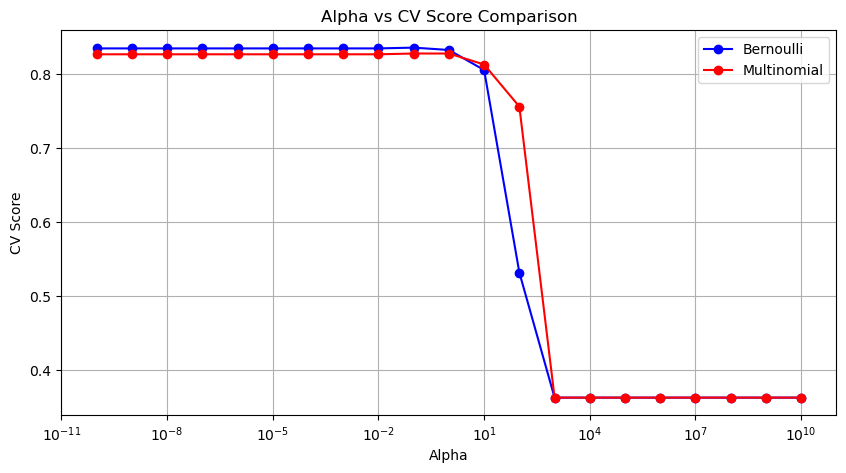

In [27]:
plt.figure(figsize=(10, 5))
plt.semilogx(alpha_values, cv_scores_bernoulli, marker='o', linestyle='-', color='blue', label='Bernoulli')
plt.semilogx(alpha_values, cv_scores_multinomial, marker='o', linestyle='-', color='red', label='Multinomial')
plt.title('Alpha vs CV Score Comparison')
plt.xlabel('Alpha')
plt.ylabel('CV Score')
plt.legend()
plt.grid(True)
plt.show()